# Análise Temporal das Emissões de Gases de Efeito Estufa no Distrito Federal (1970–2023)

**Autor:** Pedro Lc  
**Objetivo:** Analisar a evolução e o comportamento das emissões de gases ao longo do tempo, com foco em tendências, picos e variações setoriais.


 
## Introdução

Este projeto tem como objetivo realizar uma análise estatística da evolução das emissões de gases ao longo do tempo, utilizando dados reais referentes ao período analisado. A partir desses dados, busca-se identificar padrões, variações significativas e possíveis comportamentos atípicos, apoiando a análise em visualizações gráficas e interpretação estatística.

A análise foi desenvolvida utilizando Python e bibliotecas amplamente empregadas na área de ciência de dados, com foco na clareza dos resultados e na comunicação objetiva das conclusões obtidas.


## Descrição dos Dados

Os dados utilizados nesta análise foram obtidos a partir de uma base contendo informações sobre a emissão de gases ao longo de diferentes anos. Cada registro representa a quantidade estimada de emissões em determinado período, permitindo a análise temporal do comportamento desses valores.

Antes da análise, os dados passaram por uma etapa de leitura e organização, garantindo que estivessem estruturados de forma adequada para a geração de gráficos e cálculos estatísticos.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

dados = pd.read_csv('gases.csv')

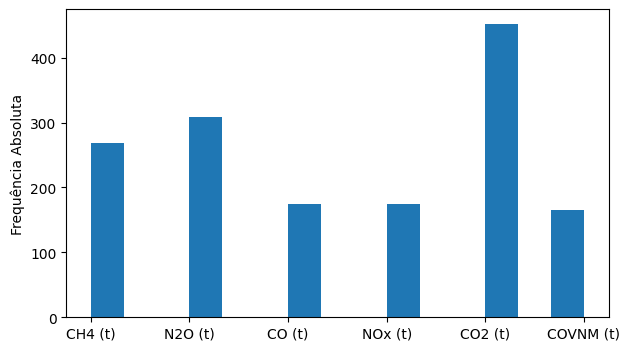

In [5]:

gases =[ dados['Gás']]
plt.figure(figsize=(7, 4))
plt.ylabel('Frequência Absoluta')
plt.hist(gases, bins=15) # bins = número de barras
# plt.grid(True)
plt.show()


## Análise da Distribuição das Emissões por Tipo de Gás

O gráfico apresenta a distribuição das emissões de gases no Distrito Federal, expressas em toneladas, permitindo a comparação direta entre diferentes tipos de poluentes atmosféricos.

Observa-se que o dióxido de carbono (CO₂) é o gás com maior volume de emissão, ultrapassando 450 toneladas, o que evidencia seu papel dominante no impacto ambiental da região. Em seguida, destacam-se o óxido nitroso (N₂O) e o metano (CH₄), ambos reconhecidos como gases de efeito estufa relevantes, embora emitidos em quantidades inferiores ao CO₂.

Os demais gases — monóxido de carbono (CO), óxidos de nitrogênio (NOx) e compostos orgânicos voláteis não metânicos (COVNM) — apresentam valores relativamente próximos entre si e significativamente menores quando comparados aos principais gases de efeito estufa. Isso indica que, apesar de sua contribuição para a poluição atmosférica, seu impacto quantitativo é menos expressivo no contexto analisado.

De forma geral, os resultados indicam que as emissões estão fortemente concentradas em gases associados ao efeito estufa, especialmente o CO₂, reforçando a importância de políticas ambientais voltadas à redução desse tipo de emissão.



In [6]:
anos = [str(ano) for ano in range(1970, 2024)]
dados_anos = dados[anos]

emissoes_totais = dados_anos.sum()


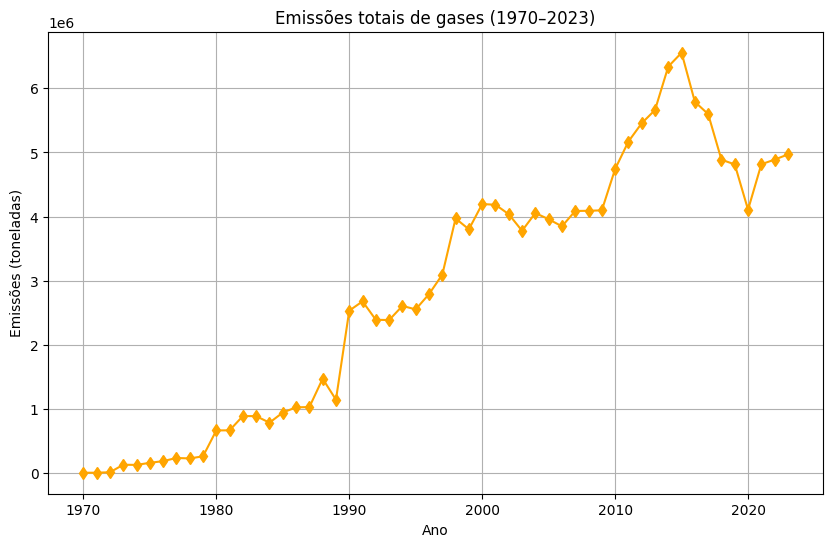

In [7]:
emissoes_totais.index = emissoes_totais.index.astype(int)

plt.figure(figsize=(10,6))
plt.plot(emissoes_totais.index, emissoes_totais.values, color='orange', marker='d')
plt.title("Emissões totais de gases (1970–2023)")
plt.xlabel("Ano")
plt.ylabel("Emissões (toneladas)")
plt.grid(True)
plt.show()



## Análise da Evolução das Emissões Totais de Gases (1970–2023)

O gráfico evidencia uma tendência geral de crescimento nas emissões totais de gases ao longo do período analisado. Entre 1970 e o início da década de 1980, os valores permanecem relativamente baixos e estáveis, indicando um cenário inicial de menor impacto ambiental.

A partir da década de 1980, observa-se um crescimento mais consistente, com aceleração significativa a partir dos anos 1990, culminando em valores próximos a 4 milhões de toneladas por volta de 2010. Esse comportamento sugere um aumento contínuo das atividades emissoras ao longo do tempo.

O ponto mais expressivo da série ocorre entre 2014 e 2015, quando as emissões atingem o maior valor registrado, ultrapassando 6 milhões de toneladas. Esse pico indica um evento ou conjunto de fatores específicos que provocaram um aumento abrupto em curto período.

Após esse pico, nota-se uma redução acentuada em 2016, seguida por um período de relativa estabilização entre 2017 e 2023, com pequenas oscilações em torno de 4 a 5 milhões de toneladas. Esse comportamento pode indicar a adoção de medidas de controle, mudanças estruturais ou fatores externos que impactaram temporariamente os níveis de emissão.


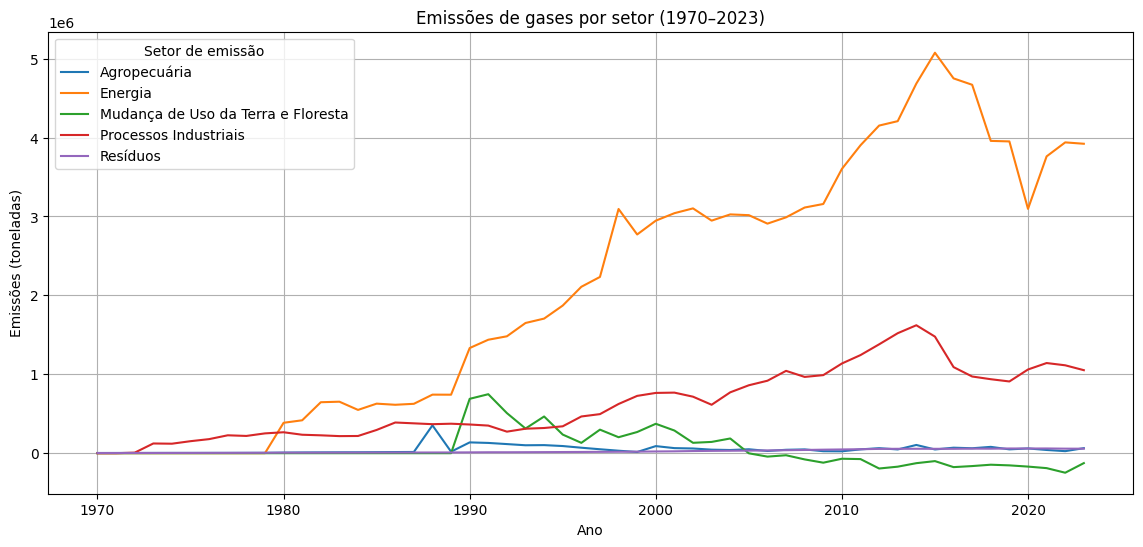

In [8]:

anos = [str(ano) for ano in range(1970, 2024)]

 #ransformar de wide para long pq se adapta melhor ao seaborn 
dados_long = dados.melt(
    id_vars=['Setor de emissão'],  # mantém o setor fixo
    value_vars=anos,               # só derrete os anos
    var_name='Ano', # 
    value_name='Emissões' # 
)

dados_long['Ano'] = dados_long['Ano'].astype(int) # converter ano para numeros 




dados_agrupados = dados_long.groupby(["Ano", "Setor de emissão"])["Emissões"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=dados_agrupados,
    x="Ano",
    y="Emissões",
    hue="Setor de emissão",
    
)

plt.title("Emissões de gases por setor (1970–2023)")
plt.xlabel("Ano")
plt.ylabel("Emissões (toneladas)")
plt.grid(True)
plt.show()

#import seaborn as sns
#sns.histplot(dados, x="Emissão/Remoção/Bunker", hue="Setor de emissão", multiple="dodge")

## Análise das Emissões por Setor (1970–2023)

O gráfico evidencia a contribuição relativa de cada setor para as emissões totais de gases ao longo do tempo. Observa-se que o setor de **Energia** é o principal responsável pelas emissões no período analisado, apresentando crescimento contínuo desde a década de 1980 e atingindo valores próximos a 5 milhões de toneladas por volta de 2015.

O setor de **Processos Industriais** também apresenta crescimento relevante, sobretudo a partir dos anos 2000, alcançando seu pico em torno de 1,5 milhão de toneladas, o que indica intensificação da atividade industrial ao longo das últimas décadas.

Em contraste, os setores de **Mudança de Uso da Terra e Floresta**, **Agropecuária** e **Resíduos** apresentam valores significativamente menores e maior variabilidade. A queda observada no setor de uso da terra sugere possíveis mudanças em práticas ambientais ou políticas de controle, enquanto os demais setores mantêm participação mais estável ao longo do tempo.

De forma geral, o gráfico demonstra que as emissões no período são fortemente concentradas nos setores de Energia e Indústria, responsáveis pela maior parcela do impacto ambiental analisado.


A seguir, é apresentada uma análise complementar da distribuição dos registros, considerando os diferentes tipos de classificação dos dados.


<Axes: xlabel='Emissão/Remoção/Bunker', ylabel='Count'>

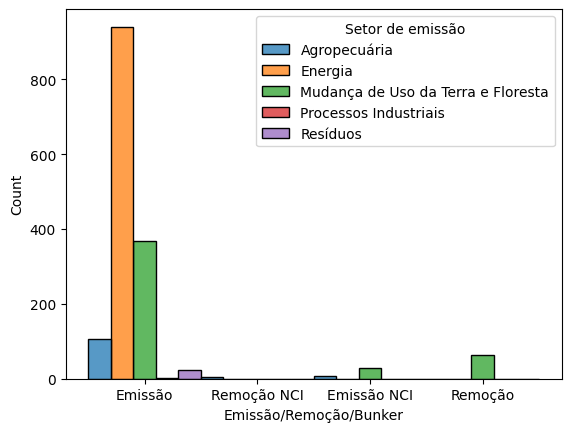

In [9]:

import seaborn as sns
sns.histplot(dados, x="Emissão/Remoção/Bunker", hue="Setor de emissão", multiple="dodge")

## Análise da Distribuição por Tipo de Registro (Emissão e Remoção)

Este gráfico apresenta a distribuição dos registros segundo o tipo de classificação (Emissão, Remoção, NCI e Bunker), segmentada por setor. Observa-se que a grande maioria dos registros está associada à categoria **Emissão**, indicando que os dados analisados representam predominantemente fontes emissoras de gases.

Os registros de **Remoção** aparecem em menor quantidade e estão mais concentrados em setores específicos, como Mudança de Uso da Terra e Floresta, refletindo o papel desse setor na absorção de gases de efeito estufa.

As categorias **NCI** e **Bunker** apresentam ocorrência residual no conjunto de dados, indicando menor representatividade no contexto da análise. Esse comportamento sugere que, para o período e escopo considerados, o impacto ambiental é fortemente determinado pelas emissões diretas, com menor contribuição relativa de processos de remoção.


## Discussão dos Resultados

Com base nos resultados observados, é possível levantar hipóteses sobre os fatores que influenciaram a variação das emissões, como crescimento populacional, expansão de atividades industriais e alterações no consumo de combustíveis.

Ressalta-se que essas hipóteses são fundamentadas na análise dos dados apresentados, porém sua confirmação exigiria a integração com informações adicionais de natureza econômica, social ou ambiental.


## Contextualização do Pico de Emissões em 2014 e 2015
Um fator chave para o pico percebido é o impacto da Copa do Mundo de 2014 em Brasília, que gerou 2,72 milhões de tCO₂e nacionalmente (quase o dobro da Copa anterior), devido a construções de estádios, expansão de aeroportos e aumento no transporte aéreo e rodoviário. No DF, isso intensificou emissões em querosene de aviação e veículos, com obras como a reforma do Estádio Mané Garrincha contribuindo para picos locais em Processos Industriais (ex.: cimento). A crise hídrica de 2014-2015 também forçou maior uso de fontes fósseis na energia, ampliando emissões.

Com base em dados oficiais e relatórios ambientais, o aumento nas emissões de gases de efeito estufa (GEE) no Brasil durante 2014-2015 foi impulsionado principalmente por desmatamento e maior uso de energia fóssil, embora no DF (mais urbano) o impacto seja mais ligado a infraestrutura e eventos. No país como um todo, as emissões subiram 3,5% em 2015 em relação a 2014, totalizando cerca de 2,07 bilhões de tCO₂e, com o desmatamento respondendo por grande parte do aumento, contrariando tendências de queda anteriores. No setor de energia, a redução na geração hidrelétrica devido à crise hídrica levou a maior despacho de termelétricas fósseis, elevando emissões em 2015 para níveis recordes na série histórica.

Especificamente no DF, o inventário de emissões de 2005-2018 mostra emissões totais (com LULUCF) de 10,62 milhões de tCO₂e em 2014 e 10,27 milhões em 2015, indicando uma leve redução geral, mas com aumento no setor de Mudança no Uso da Terra (de 1,76 para 2,38 milhões de tCO₂e), possivelmente ligado a transições de floresta para pastagem ou expansão urbana. No entanto, setores como Energia e Processos Industriais mostram reduções em 2015, atribuídas a variações no consumo de combustíveis e produção de cimento.



## Conclusão

A análise realizada permitiu identificar padrões relevantes no comportamento das emissões de gases, evidenciando tanto tendências gerais quanto variações pontuais significativas.

O uso de visualizações gráficas e análise estatística mostrou-se eficaz para a interpretação dos dados ambientais, demonstrando a aplicação prática de ferramentas de análise de dados no suporte à compreensão de fenômenos reais.


## Referências
Observatório do Clima. (2015). Sistema de Estimativas de Emissões de Gases de Efeito Estufa (SEEG). Disponível em: seeg.eco.br.



Observatório do Clima. (2016). Análise das Emissões Brasileiras de GEE e suas implicações para as metas do Brasil. Disponível em: seeg.eco.br.



WWF Brasil. (2015). Emissões de GEE na Copa do Mundo de 2014.



Governo do Distrito Federal. (2014). Relatório de Impacto Ambiental da Copa do Mundo.



Ministério do Meio Ambiente (MMA). (2014). Inventário Nacional de Emissões Atmosféricas.



Governo do Distrito Federal. (2020). Inventário de Emissões de Gases de Efeito Estufa do DF (2005-2018).



Painel Brasileiro de Mudanças Climáticas (PBMC). (2015). Relatório de Avaliação.



Agência Nacional de Energia Elétrica (ANEEL). (2015). Relatório Anual de Geração.



Empresa de Pesquisa Energética (EPE). (2016). Balanço Energético Nacional 2015.



Governo do Distrito Federal. (2020). Inventário de Emissões de Gases de Efeito Estufa do DF (2005-2018).